<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_dl_lab4_Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [292]:
tel_data =pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
tel_data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [293]:
tel_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [294]:
#checking for missing values
tel_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [295]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [296]:
tel_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<ipython-input-297-0af843fd110f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_corr = tel_data.corr()


<Axes: >

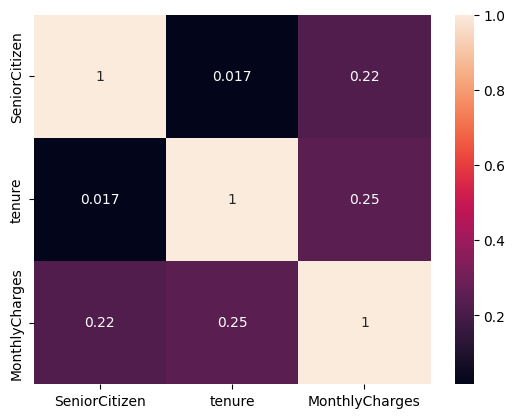

In [297]:
churn_corr = tel_data.corr()
churn_corr_top = churn_corr.index
sn.heatmap(tel_data[churn_corr_top].corr(), annot=True)

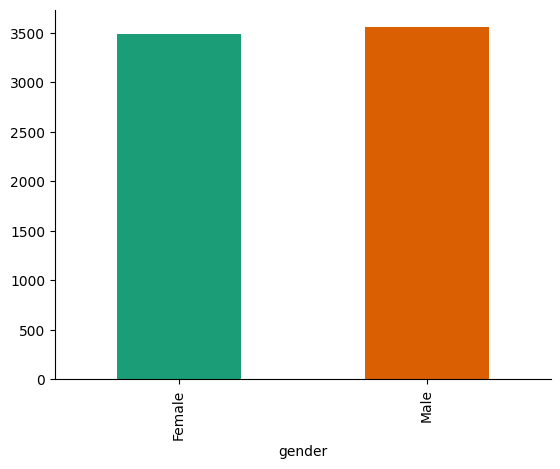

In [298]:
from matplotlib import pyplot as plt
import seaborn as sns
tel_data.groupby('gender').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [299]:
#droping customer Id as it is not neccessary
tel_data.drop('customerID',axis='columns',inplace=True)

In [300]:
tel_data['gender'].value_counts()


Male      3555
Female    3488
Name: gender, dtype: int64

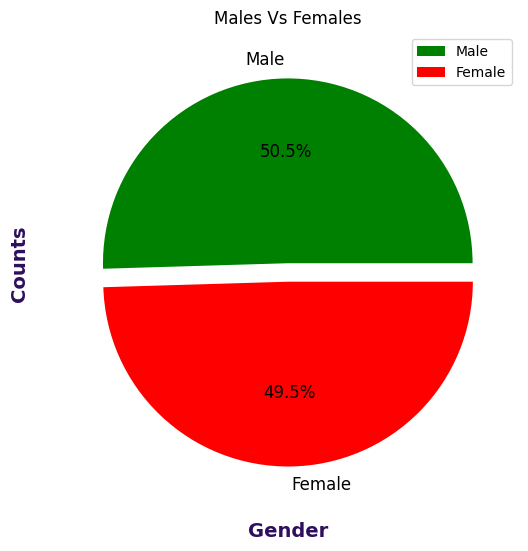

In [301]:
plt.figure(figsize = (20, 6))

counts = tel_data["gender"].value_counts()
explode = (0, 0.1)
colors=["green","red"]
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [302]:
#convert the gender male to 0 and female 1
tel_data['gender'] = tel_data['gender'].map({'Male': 0, 'Female': 1})


In [303]:
#Count of Partner
tel_data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

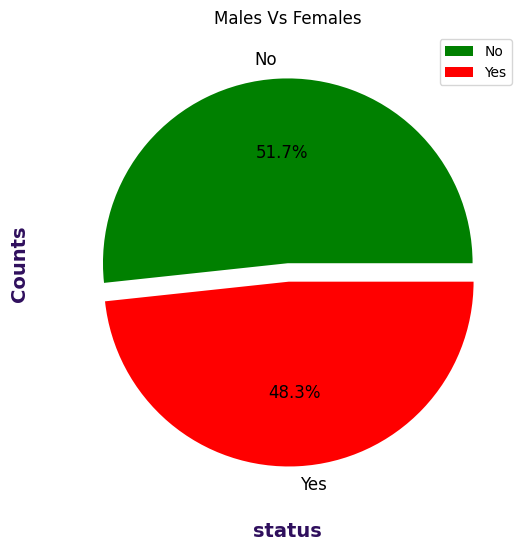

In [304]:
plt.figure(figsize = (20, 6))

counts = tel_data["Partner"].value_counts()
explode = (0, 0.1)
colors=["green","red"]
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [305]:
#convert the partner status no to 0 and yes 1
tel_data['Partner']=tel_data['Partner'].map({'No': 0, 'Yes': 1})

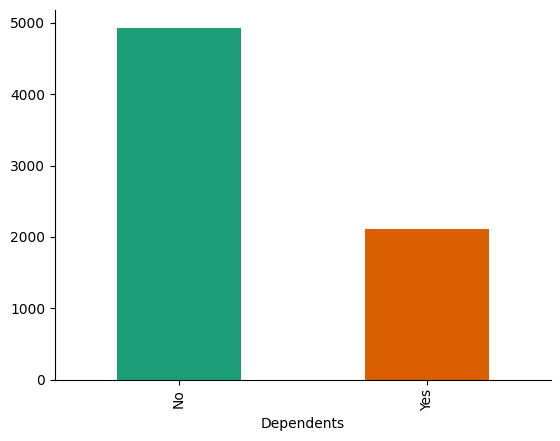

In [306]:
from matplotlib import pyplot as plt
import seaborn as sns
tel_data.groupby('Dependents').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [307]:
#convert the dependents male to 0 and female 1
tel_data['Dependents']=tel_data['Dependents'].map({'No': 0, 'Yes': 1})

In [308]:
#Phone Service
tel_data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

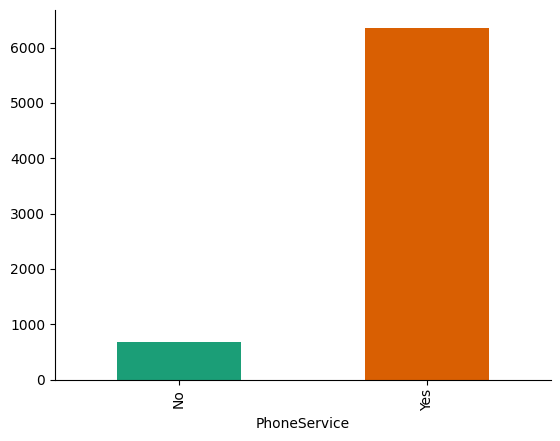

In [309]:
#visualisation of Phone Service
from matplotlib import pyplot as plt
import seaborn as sns
tel_data.groupby('PhoneService').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [310]:
#convert the gender male to 0 and female 1
tel_data['PhoneService']=tel_data['PhoneService'].map({'No': 0, 'Yes': 1})

In [311]:
#Multiple_lines
tel_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

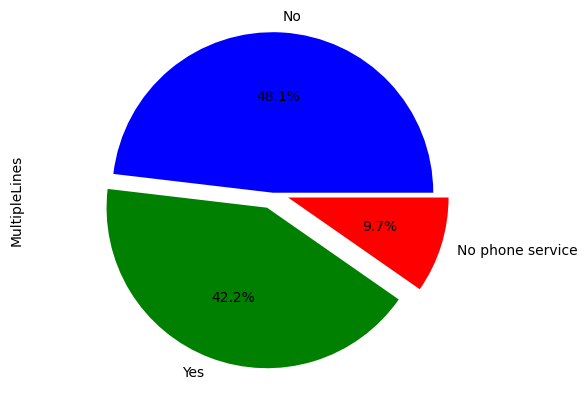

In [312]:
colors = ["blue" , "green" , "red"]
explode = (0, 0.1  , 0.1)
tel_data['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors,explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [313]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tel_data.InternetService = le.fit_transform(tel_data.InternetService)
tel_data.Contract = le.fit_transform(tel_data.Contract)
tel_data.PaymentMethod = le.fit_transform(tel_data.PaymentMethod)
tel_data.	MultipleLines= le.fit_transform(tel_data.	MultipleLines)

In [314]:
tel_data.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1664,1,0,0,0,46,1,2,1,No,No,No,No,Yes,Yes,0,No,0,96.05,4399.5,Yes
2982,0,0,1,1,52,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,Yes,1,20.85,1071.6,No
3640,0,1,1,0,29,1,2,1,No,Yes,Yes,No,No,Yes,0,Yes,2,95.90,2745.2,Yes
1935,1,0,0,0,51,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,Yes,0,19.85,996.95,No
3218,0,0,0,0,68,1,0,1,No,Yes,Yes,No,No,No,1,No,1,79.60,5461.45,No
6380,0,1,1,0,65,1,2,1,No,Yes,Yes,No,Yes,Yes,0,Yes,2,104.35,6578.55,No
437,0,0,1,1,72,1,2,1,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,1,114.05,8468.2,No
4675,0,0,0,0,43,1,2,1,No,No,No,Yes,Yes,Yes,1,Yes,2,100.00,4211.55,Yes
7024,0,0,1,0,44,1,2,1,Yes,No,Yes,No,No,No,0,Yes,1,84.80,3626.35,No
1815,1,0,1,0,72,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,1,20.50,1502.25,No


In [315]:
tel_data.replace('No internet service','No',inplace=True)
tel_data.replace('No phone service','No',inplace=True)

In [316]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  tel_data[col].replace({'Yes': 1,'No': 0},inplace=True)

In [317]:
pd.to_numeric(tel_data.TotalCharges,errors='coerce').isnull().sum()

11

In [318]:
tel_data[pd.to_numeric(tel_data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,1,0,1,0,1,1,1,0,2,1,0,52.55,,0
753,0,0,0,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.25,,0
936,1,0,1,1,0,1,0,0,1,1,1,0,1,1,2,0,3,80.85,,0
1082,0,0,1,1,0,1,2,2,0,0,0,0,0,0,2,0,3,25.75,,0
1340,1,0,1,1,0,0,1,0,1,1,1,1,1,0,2,0,1,56.05,,0
3331,0,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,19.85,,0
3826,0,0,1,1,0,1,2,2,0,0,0,0,0,0,2,0,3,25.35,,0
4380,1,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.00,,0
5218,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,1,3,19.70,,0
6670,1,0,1,1,0,1,2,0,0,1,1,1,1,0,2,0,3,73.35,,0


In [319]:
#Removing rows with the 11 null values
tel_data = tel_data[tel_data.TotalCharges!=' ']
tel_data.shape

(7032, 20)

In [320]:
#minMax Scaler
min_scale= ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tel_data[min_scale] = scaler.fit_transform(tel_data[min_scale])

<ipython-input-320-4aa145a49762>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel_data[min_scale] = scaler.fit_transform(tel_data[min_scale])


In [321]:
tel_data[min_scale ].sample(10)

,tenure,MonthlyCharges,TotalCharges
5973,0.887324,0.857214,0.770119
787,0.464789,0.423881,0.229033
2945,0.112676,0.570647,0.074169
6871,0.718310,0.759701,0.577775
5399,0.690141,0.014925,0.111961
6326,0.859155,0.252239,0.315013
3172,0.338028,0.772637,0.280400
4613,0.746479,0.609453,0.502129
4896,0.323944,0.312935,0.132587
2389,0.985915,0.668657,0.724908


In [322]:
#predictor and target variable
x = tel_data.drop('Churn',axis='columns')
y = tel_data['Churn']

In [323]:
x.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,0.000000,0,1,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275
1,0,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867
2,0,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310
3,0,0,0,0,0.619718,0,1,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241
4,1,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330
5,1,0,0,0,0.098592,1,2,1,0,0,1,0,1,1,0,1,2,0.809950,0.092511
6,0,0,0,1,0.295775,1,2,1,0,1,0,0,1,0,0,1,1,0.704975,0.222779
7,1,0,0,0,0.126761,0,1,0,1,0,0,0,0,0,0,0,3,0.114428,0.032668
8,1,0,1,0,0.380282,1,2,1,0,0,1,1,1,1,0,1,2,0.861194,0.349325
9,0,0,0,1,0.859155,1,0,0,1,1,0,0,0,0,1,0,0,0.377114,0.400317


In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [325]:
X_train.shape

(5625, 19)

In [326]:
y_train.shape

(5625,)

In [327]:
X_test.shape

(1407, 19)

In [328]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [329]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report,auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

In [330]:
model1 = Sequential()
model1.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=32, activation='relu'))  # Additional hidden layer with 32 nodes
model1.add(Dense(units=1, activation='sigmoid'))
print(model1.summary())
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 128)               2560      
                                                                 
 dense_91 (Dense)            (None, 64)                8256      
                                                                 
 dense_92 (Dense)            (None, 32)                2080      
                                                                 
 dense_93 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [331]:
train_history=model1.fit(X_train, y_train,validation_split=0.8, epochs= 50,  batch_size=200, verbose=2)

#train_history=model1.fit(X_train, y_train,validation_split=0.8, epochs= 100,  batch_size=500, verbose=2)



Epoch 1/50
6/6 - 2s - loss: 0.5508 - accuracy: 0.7028 - val_loss: 0.4714 - val_accuracy: 0.7509 - 2s/epoch - 391ms/step
Epoch 2/50
6/6 - 0s - loss: 0.4647 - accuracy: 0.7518 - val_loss: 0.4604 - val_accuracy: 0.7436 - 135ms/epoch - 23ms/step
Epoch 3/50
6/6 - 0s - loss: 0.4444 - accuracy: 0.7838 - val_loss: 0.4363 - val_accuracy: 0.7912 - 137ms/epoch - 23ms/step
Epoch 4/50
6/6 - 0s - loss: 0.4217 - accuracy: 0.7909 - val_loss: 0.4337 - val_accuracy: 0.7912 - 234ms/epoch - 39ms/step
Epoch 5/50
6/6 - 0s - loss: 0.4129 - accuracy: 0.7972 - val_loss: 0.4350 - val_accuracy: 0.7860 - 236ms/epoch - 39ms/step
Epoch 6/50
6/6 - 0s - loss: 0.4050 - accuracy: 0.7963 - val_loss: 0.4342 - val_accuracy: 0.7854 - 151ms/epoch - 25ms/step
Epoch 7/50
6/6 - 0s - loss: 0.3887 - accuracy: 0.8123 - val_loss: 0.4462 - val_accuracy: 0.7912 - 225ms/epoch - 37ms/step
Epoch 8/50
6/6 - 0s - loss: 0.3923 - accuracy: 0.8149 - val_loss: 0.4487 - val_accuracy: 0.7943 - 145ms/epoch - 24ms/step
Epoch 9/50
6/6 - 0s - loss

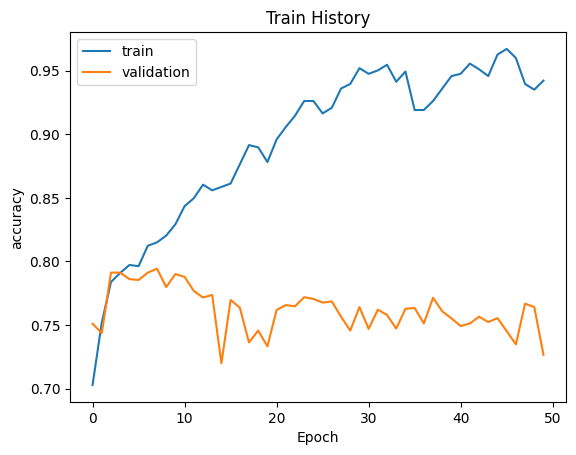

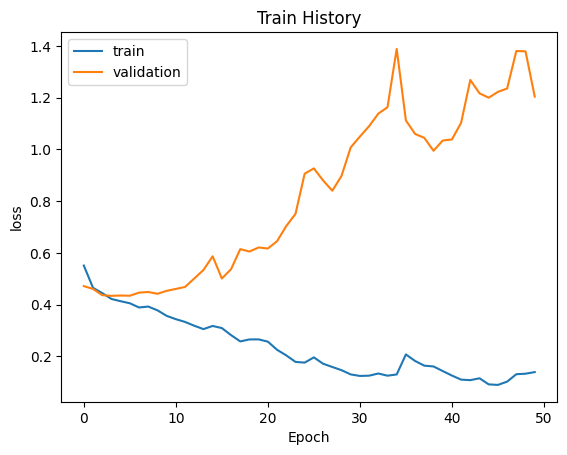

44/44 [==============================] - 0s 2ms/step - loss: 1.3418 - accuracy: 0.6965


accuracy= 0.6965174078941345


In [332]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

scores = model1.evaluate(X_test, y_test)
print('\n')
print('accuracy=',scores[1])

In [333]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

44/44 [==============================] - 0s 2ms/step - loss: 1.3418 - accuracy: 0.6965
Test Loss: 1.34177565574646, Test Accuracy: 0.6965174078941345


In [334]:
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, np.argmax(y_pred1, axis=1))
f11 = f1_score(y_test, np.argmax(y_pred1, axis=1))
roc_auc1 = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_pred1)

44/44 [==============================] - 0s 1ms/step


In [335]:
y_pred1 = model1.predict(X_test)
y_pred1

44/44 [==============================] - 0s 1ms/step


array([[1.12335915e-02],
       [5.48896473e-03],
       [1.13029397e-09],
       ...,
       [9.72102165e-01],
       [9.39898491e-01],
       [2.73943450e-02]], dtype=float32)

In [336]:
y_pred1 = (y_pred1 > 0.5)
y_pred1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

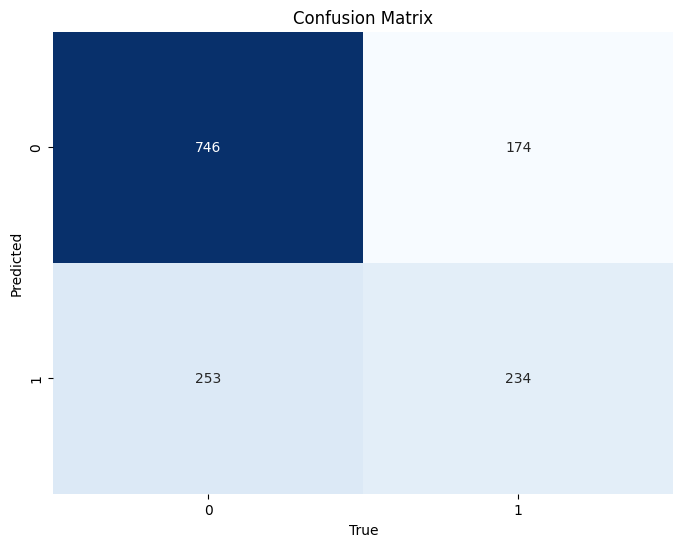

In [337]:
cm = confusion_matrix(y_pred1,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

In [338]:
#classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       999
           1       0.48      0.57      0.52       408

    accuracy                           0.70      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.72      0.70      0.70      1407



In [339]:
# Define the model with dropout layers
model2 = Sequential()
model2.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.5))  # Adding dropout layer after the first hidden layer
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(0.5))  # Adding dropout layer after the second hidden layer
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.5))  # Adding dropout layer after the third hidden layer
model2.add(Dense(units=1, activation='sigmoid'))
model2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 128)               2560      
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_95 (Dense)            (None, 64)                8256      
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_97 (Dense)            (None, 1)               

In [340]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [341]:
model2.fit(X_train, y_train, epochs=50,validation_split=0.30,  batch_size=200, verbose=2)


Epoch 1/50
20/20 - 2s - loss: 0.5226 - accuracy: 0.7346 - val_loss: 0.4628 - val_accuracy: 0.7648 - 2s/epoch - 93ms/step
Epoch 2/50
20/20 - 0s - loss: 0.4725 - accuracy: 0.7595 - val_loss: 0.4620 - val_accuracy: 0.7802 - 183ms/epoch - 9ms/step
Epoch 3/50
20/20 - 0s - loss: 0.4524 - accuracy: 0.7691 - val_loss: 0.4427 - val_accuracy: 0.7820 - 176ms/epoch - 9ms/step
Epoch 4/50
20/20 - 0s - loss: 0.4422 - accuracy: 0.7816 - val_loss: 0.4403 - val_accuracy: 0.7879 - 171ms/epoch - 9ms/step
Epoch 5/50
20/20 - 0s - loss: 0.4495 - accuracy: 0.7869 - val_loss: 0.4338 - val_accuracy: 0.7903 - 217ms/epoch - 11ms/step
Epoch 6/50
20/20 - 0s - loss: 0.4421 - accuracy: 0.7892 - val_loss: 0.4357 - val_accuracy: 0.7879 - 230ms/epoch - 12ms/step
Epoch 7/50
20/20 - 0s - loss: 0.4390 - accuracy: 0.7953 - val_loss: 0.4339 - val_accuracy: 0.7921 - 220ms/epoch - 11ms/step
Epoch 8/50
20/20 - 0s - loss: 0.4389 - accuracy: 0.7882 - val_loss: 0.4457 - val_accuracy: 0.7909 - 218ms/epoch - 11ms/step
Epoch 9/50
20/

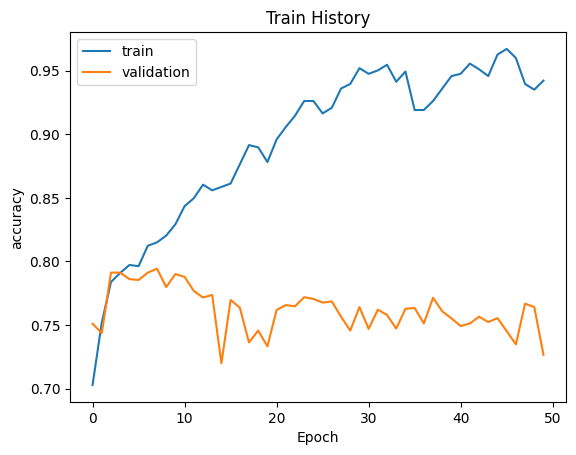

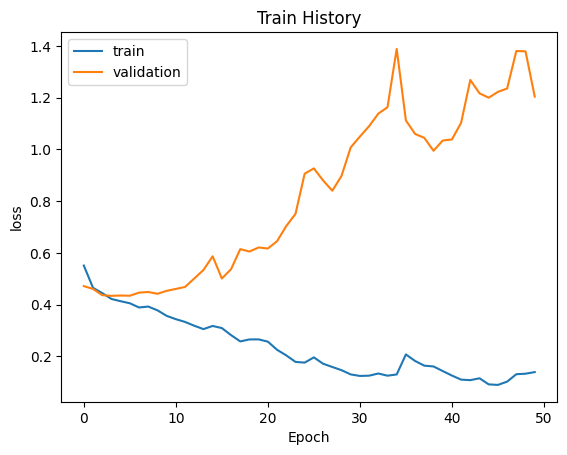

44/44 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7783


accuracy= 0.778251588344574


In [342]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

scores = model2.evaluate(X_test, y_test)
print('\n')
print('accuracy=',scores[1])

In [343]:
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

44/44 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7783
Test Loss: 0.4646386206150055, Test Accuracy: 0.778251588344574


In [362]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test, np.argmax(y_pred2, axis=1))
f12 = f1_score(y_test, np.argmax(y_pred2, axis=1))
roc_auc2 = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_pred2)

44/44 [==============================] - 0s 5ms/step


In [344]:
y_pred2= model2.predict(X_test)
y_pred2

44/44 [==============================] - 0s 1ms/step


array([[0.27680373],
       [0.4184489 ],
       [0.01434585],
       ...,
       [0.62701315],
       [0.6096307 ],
       [0.3281567 ]], dtype=float32)

In [345]:
y_pred2 =  (y_pred2 > 0.5)
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

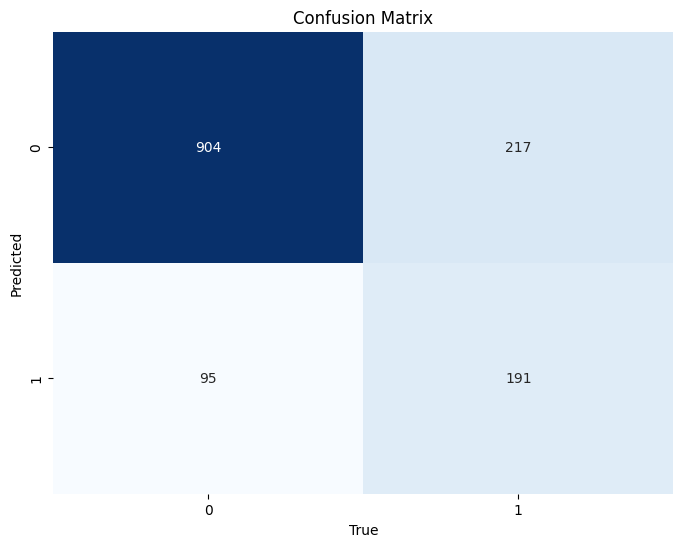

In [346]:
cm = confusion_matrix(y_pred2,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

In [347]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.47      0.55       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [348]:
#implementation of layerwise dropout
model3 = Sequential()
model3.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dropout(0.2))  # Adding dropout layer after the first hidden layer
model3.add(Dense(units=64, activation='relu'))
model3.add(Dropout(0.3))  # Adding dropout layer after the second hidden layer
model3.add(Dense(units=32, activation='relu'))
model3.add(Dropout(0.4))  # Adding dropout layer after the third hidden layer
model3.add(Dense(units=1, activation='sigmoid'))
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 128)               2560      
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_99 (Dense)            (None, 64)                8256      
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_100 (Dense)           (None, 32)                2080      
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                                 
 dense_101 (Dense)           (None, 1)               

Layerwise dropout is a technique used in deep learning to regularize neural networks and prevent overfitting. It is an extension of the traditional dropout technique, where instead of randomly dropping out individual neurons during training, entire layers of the neural network are randomly dropped out.

The idea behind layerwise dropout is to introduce additional noise during training by randomly removing entire layers from the network.

In [349]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model on your data
train_history=model3.fit(X_train, y_train, epochs=50,validation_split=0.8, batch_size=200, verbose=2)


Epoch 1/50
6/6 - 1s - loss: 0.6938 - accuracy: 0.5391 - val_loss: 0.5884 - val_accuracy: 0.7421 - 1s/epoch - 226ms/step
Epoch 2/50
6/6 - 0s - loss: 0.6175 - accuracy: 0.7037 - val_loss: 0.5493 - val_accuracy: 0.7421 - 82ms/epoch - 14ms/step
Epoch 3/50
6/6 - 0s - loss: 0.5688 - accuracy: 0.7286 - val_loss: 0.5305 - val_accuracy: 0.7421 - 112ms/epoch - 19ms/step
Epoch 4/50
6/6 - 0s - loss: 0.5574 - accuracy: 0.7304 - val_loss: 0.5144 - val_accuracy: 0.7421 - 110ms/epoch - 18ms/step
Epoch 5/50
6/6 - 0s - loss: 0.5384 - accuracy: 0.7331 - val_loss: 0.4982 - val_accuracy: 0.7421 - 116ms/epoch - 19ms/step
Epoch 6/50
6/6 - 0s - loss: 0.5337 - accuracy: 0.7251 - val_loss: 0.4830 - val_accuracy: 0.7421 - 83ms/epoch - 14ms/step
Epoch 7/50
6/6 - 0s - loss: 0.5038 - accuracy: 0.7375 - val_loss: 0.4690 - val_accuracy: 0.7421 - 82ms/epoch - 14ms/step
Epoch 8/50
6/6 - 0s - loss: 0.4920 - accuracy: 0.7375 - val_loss: 0.4566 - val_accuracy: 0.7485 - 82ms/epoch - 14ms/step
Epoch 9/50
6/6 - 0s - loss: 0.

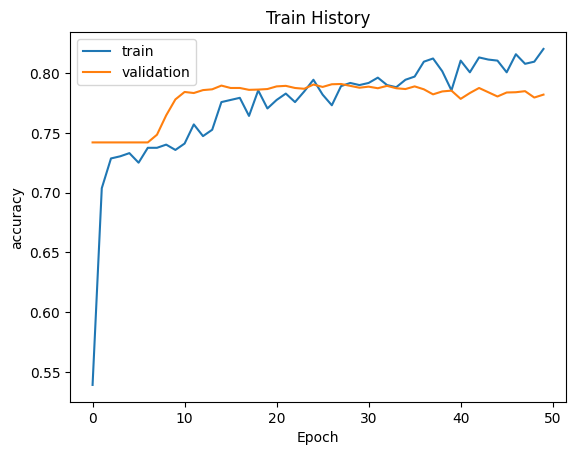

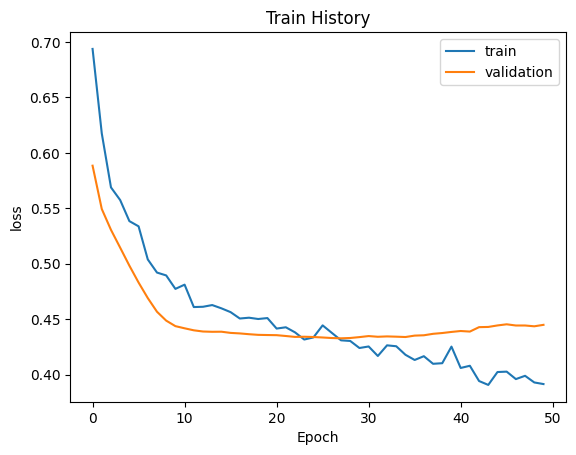

In [350]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [351]:
accuracy3 = model3.evaluate(X_test, y_test)
print('\n')
print('accuracy=',accuracy3[1])

44/44 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7740


accuracy= 0.7739872336387634


In [352]:
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, np.argmax(y_pred3, axis=1))
f13 = f1_score(y_test, np.argmax(y_pred3, axis=1))
roc_auc3 = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_pred3)

44/44 [==============================] - 0s 2ms/step


In [353]:
y_pred3 =  (y_pred3 > 0.5)
y_pred3

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

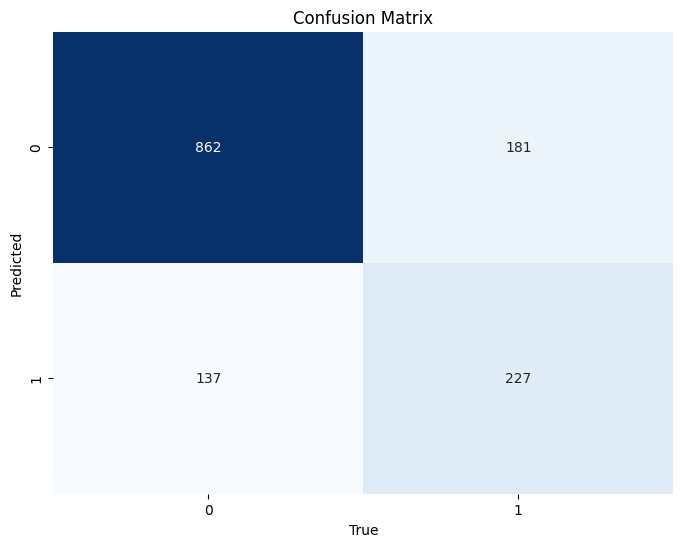

In [354]:
cm = confusion_matrix(y_pred3,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [355]:

def monte_carlo_inference(model, x, num_samples):
    y_preds = np.zeros((num_samples, x.shape[0], 10))
    for i in range(num_samples):
        y_preds[i] = tf.nn.softmax(model(x, training=True)).numpy()
    return y_preds

In [356]:
x_test = np.array(X_test)

In [357]:
# Perform Monte Carlo Dropout inference on test data
y_preds_mc = monte_carlo_inference(model1, x_test, 10)
y_preds_mc = (y_preds_mc>0.5)
mean_prediction = np.mean(y_preds_mc, axis=0)
uncertainty = np.std(y_preds_mc, axis=0)

In [358]:
# Evaluate accuracy
accuracy = np.mean(np.argmax(mean_prediction, axis=1) == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 71.00%


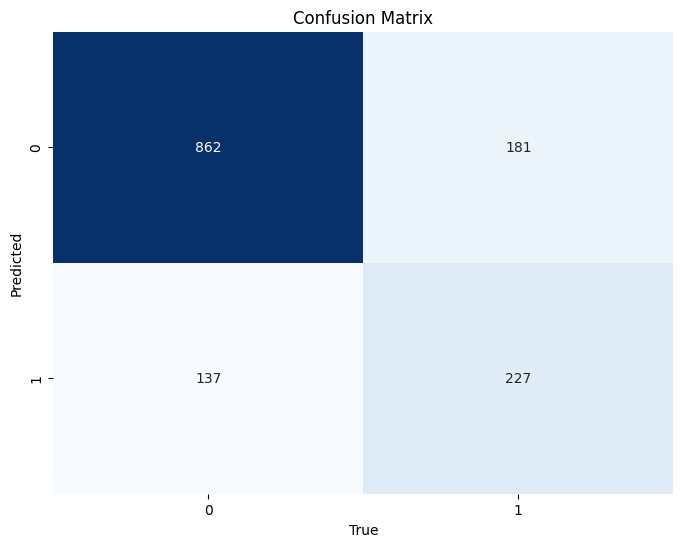

In [359]:
conf_matrix = confusion_matrix(y_test, np.argmax(mean_prediction, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()